# HW 2

In [14]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import sympy as sp

**1) A little introductory brain teaser. Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?**

Answer: 
Rolling sevens is more probable. 

For snake eyes, the probability is 1/6 times 1/6 (equal to 1/36) because each die roll is an independent event. Out of all of the possible ways to roll dice (36 ways), there's only way to get two ones.

For rolling sevens, it's the convolution of two die rolls. There's multiple ways to roll a seven:
1+6
2+5
3+4
4+3
5+2
6+1
Out of all the ways one can roll dice (36 ways), this is 6 outcomes. 6/36 = 1/6

The ratio of snake eyes to sevens is $\frac{\frac{1}{36}}{\frac{1}{6}} = \frac{1}{6}$.

**2) Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram).**

*Analytically*:

Sum = 2:
* p(1,1) = 1/6 * 1/6 = 1/36

Sum = 3:
* p(1,2) + p(2,1) = 1/36 + 1/36 = 1/18

Sum = 4:
* p(2,2) + p(3,1) + p(1,3) = 1/36 + 1/36 + 1/36 = 1/12

Sum = 5:
* p(2,3) + p(3,2) + p(4,1) + p(1,4) = 1/36 + 1/36 + 1/36 + 1/36 = 1/9

Sum = 6:
* p(3,3) + p(4,2) + p(2,4) + p(5,1) + p(1,5) = 1/36 + 1/36 + 1/36 + 1/36 + 1/36 = 5/36

Sum = 7:
* p(3,4) + p(4,3) + p(5,2) + p(2,5) + p(1,6) + p(6,1) = 1/36 + 1/36 + 1/36 + 1/36 + 1/36 + 1/36 = 1/6

Sum = 8:
* p(4,4) + p(5,3) + p(3,5) + p(6,2) + p(2,6) = 1/36 + 1/36 + 1/36 + 1/36 + 1/36 = 5/36

Sum = 9:
* p(3,6) + p(6,3) + p(4,5) + p(5,4) = 1/36 + 1/36 + 1/36 + 1/36 = 1/9

Sum = 10:
* p(5,5) + p(6,4) + p(4,6) = 1/36 + 1/36 + 1/36 = 1/12

Sum = 11:
* p(6,5) + p(5,6) = 1/36 + 1/36 = 1/18

Sum = 12:
* p(6,6) = 1/6 * 1/6 = 1/36

*Numerically*:

In [120]:
die = np.array([1/6,1/6,1/6,1/6,1/6,1/6])

sums = np.convolve(die, die)
print("The probability of summing to:" )
for i in range(len(sums)):
    print(f"{i+2} is {sp.nsimplify(sums[i])}")

The probability of summing to:
2 is 1/36
3 is 1/18
4 is 1/12
5 is 1/9
6 is 5/36
7 is 1/6
8 is 5/36
9 is 1/9
10 is 1/12
11 is 1/18
12 is 1/36


**3) Calculate the mean,the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure your result makes sense.**

In [145]:
x = np.arange(2,13)
mean = np.sum(x * sums)
square = (x-mean)**2
var = np.sum(square * sums)

print(f"Mean is {mean:.2f} \nVariance is {var:.2f}")

Mean is 7.00 
Variance is 5.83


**4) Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.**

In [122]:
x_new = np.arange(10, 61)
sum_2 = np.convolve(die, die)
sum_4 = np.convolve(sum_2, sum_2)
sum_8 = np.convolve(sum_4, sum_4)
sum_10 = np.convolve(sum_8, sum_2)

mean_10 = np.sum(x_new * sum_10)
square_10 = (x_new - mean_10)**2
var_10 = np.sum(square_10 * sum_10)

print(f"Mean is {mean_10:.2f} \nVariance is {var_10:.2f}")

Mean is 35.00 
Variance is 29.17


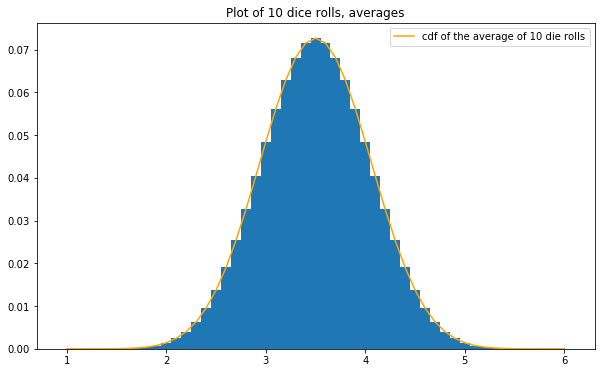

In [140]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x_new/10, sum_10, width = 0.1)
ax.plot(x_new/10, sum_10, c='orange', label ='cdf of the average of 10 die rolls')
plt.title('Plot of 10 dice rolls, averages')
ax.legend();

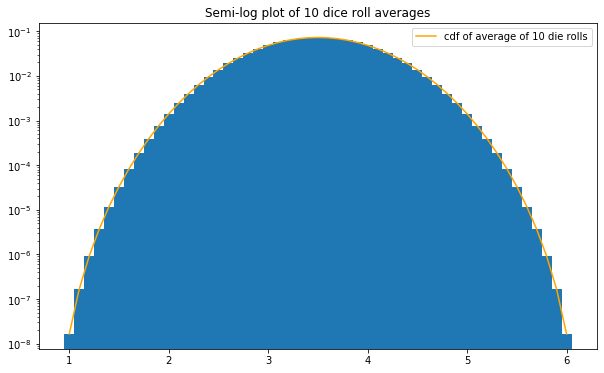

In [141]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x_new/10, sum_10, width = 0.1)
ax.plot(x_new/10, sum_10, c='orange', label ='cdf of average of 10 die rolls')
plt.yscale('log')
plt.title('Semi-log plot of 10 dice roll averages')
ax.legend();

Yes- 
EXPLANATION TIME

**5) Show that the sum and average of an initially Gaussian distribution is also a Guassian (can be analytic or numerical). How does the standard deviation of the resulting sum or average Guassian change? This is a hugely important result. Explore what this means for integrating a signal over time.**

Let's do something here

When you're integrating a signal over time, you're essentially 